Отдел маркетинга разработал новый дизайн посадочной страницы клиента (lending). Пользователи сайта оценили новый дизайн. Результаты итоговой оценки зафиксированы в количественной переменной Общая оценка. Средняя оценка старого дизайна по результатам прошлого исследования составляет 30 баллов.

Значимо ли улучшился дизайн посадочной страницы сайта, и есть ли влияние возраста на оценку нового дизайна?

Необходимо ответить на вопрос, используя статистические методы, а также дать рекомендации отделу маркетинга по результатам проведенного анализа


## Загрузка нужных библиотек

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import seaborn as sns

## Загрузка данных

In [3]:
data = pd.read_excel('данные.xlsx')

In [4]:
data.columns = ['age_group', 'score']

In [5]:
data['age_group'].value_counts()

65 и страше    17
До 25          13
35-44          12
25-34          10
45-54          10
55-64           6
Name: age_group, dtype: int64

In [6]:
mean_data = data.groupby('age_group')['score'].mean().reset_index()

In [7]:
mean_data = mean_data.sort_values(by='score')

In [8]:
mean_data

,age_group,score
4,65 и страше,28.002791
3,55-64,28.447336
5,До 25,28.749228
0,25-34,31.678010
1,35-44,37.018058
2,45-54,39.118369


## Графики

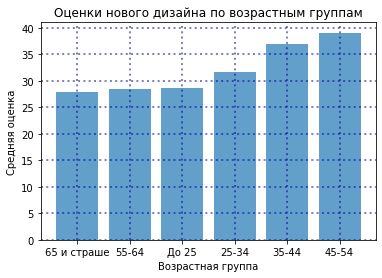

In [9]:

# Построение графика
fig, ax = plt.subplots()
ax.bar(mean_data['age_group'], mean_data['score'],alpha=0.7)

# Настройка осей и заголовка
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Средняя оценка')
ax.set_title('Оценки нового дизайна по возрастным группам')
plt.grid(color='DarkBlue', alpha=0.5, linestyle=':', linewidth=2)

# Отображение графика
plt.show()


**Вывод:**
Возрастных группы, у которых средняя оценка больше 30:

1) 45-54	**39.118369**

2) 35-44	**37.018058**

3) 25-34	**31.678010**

Возрастные группы, у которых средняя оценка меньше 30:

1)	65 и страше	**28.002791**

2)	55-64	**28.447336**

3)	До 25	**28.749228**


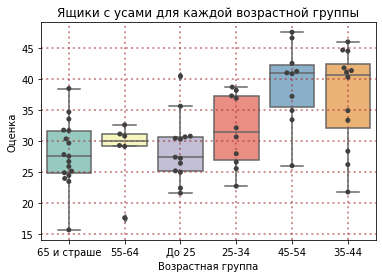

In [10]:

sns.boxplot(x="age_group", y="score", data=data, palette="Set3")
sns.swarmplot(x="age_group", y="score", data=data, color=".25")
plt.title('Ящики с усами для каждой возрастной группы')
plt.xlabel('Возрастная группа')
plt.ylabel('Оценка')
plt.grid(color='Brown', alpha=0.5, linestyle=':', linewidth=2)

plt.show()

In [11]:
def q1_q3_value(data, groups, value_column, low, high):
    for cat in groups:
        q1 = data[data['age_group'] == cat][value_column].quantile(low)
        values_below_q1 = data[(data['age_group'] == cat) & (data[value_column] < q1)][value_column]
        print(f"Для группы {cat} найдем значения меньше {low} доли данных:\n{values_below_q1.to_list()}")
    print('-'*30)
        
    for cat in groups:
        q3 = data[data['age_group'] == cat][value_column].quantile(high)
        values_above_q3 = data[(data['age_group'] == cat) & (data[value_column] > q3)][value_column]
        print(f"Для группы {cat} найдем значения больше {high} доли данных:\n{values_above_q3.to_list()}")
    print('-'*30)


**Вывод:**

В некоторых группах наблюдаются достаточно низкие и высокие значения:


In [12]:
q1_q3_value(data,data['age_group'].unique(),'score',0.05,0.95)

Для группы 65 и страше найдем значения меньше 0.05 доли данных:
[15.73447341312344]
Для группы 55-64 найдем значения меньше 0.05 доли данных:
[17.66967736054725]
Для группы До 25 найдем значения меньше 0.05 доли данных:
[21.64274236000652]
Для группы 25-34 найдем значения меньше 0.05 доли данных:
[22.76450651063485]
Для группы 45-54 найдем значения меньше 0.05 доли данных:
[26.051029338859273]
Для группы 35-44 найдем значения меньше 0.05 доли данных:
[21.82348818729791]
------------------------------
Для группы 65 и страше найдем значения больше 0.95 доли данных:
[38.454802921507216]
Для группы 55-64 найдем значения больше 0.95 доли данных:
[32.608214475353726]
Для группы До 25 найдем значения больше 0.95 доли данных:
[40.46948789993558]
Для группы 25-34 найдем значения больше 0.95 доли данных:
[38.68263722683812]
Для группы 45-54 найдем значения больше 0.95 доли данных:
[47.50146983758766]
Для группы 35-44 найдем значения больше 0.95 доли данных:
[45.95319081965232]
------------------

## Корреляционный анализ

In [13]:
# функция для корр. анализа с коэф. спирмена
def spearman_corr(df,column_cat,column_num):
    corr, p_value = stats.spearmanr(df[column_cat],df[column_num])
    print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < 0.05: 
        print('Корреляция стат. значима, поскольку p-значение меньше критического')

In [14]:
spearman_corr(data,"age_group","score")

Коэффициент корреляции Спирмена: -0.372
P-value: 0.002
Корреляция стат. значима, поскольку p-значение меньше критического


**Вывод:**

С увеличением возраста оценка имеет тендецию снижаться.

## Проверка данных на нормальность (Тест Шапиро-Уилка)

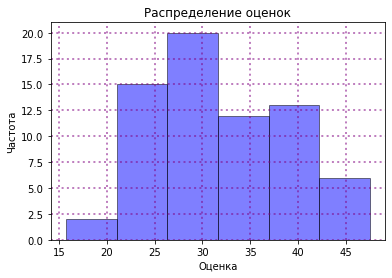

Тест шапиро-уилка результаты:
Значение теста: 0.9740
P-value: 0.1666
Распределение вероятнее всего нормальное


In [15]:

# плучаем данные для гистограммы
x = data['score']
bins = 6
# строим гистограмму
plt.hist(x, bins=6, alpha=0.5, edgecolor='black', color='blue')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок')
plt.grid(color='Purple', alpha=0.5, linestyle=':', linewidth=2)
plt.show()
# проверяем на нормальность с помощью теста Шапиро-Уилка
stat, p = stats.shapiro(x)
print(f"Тест шапиро-уилка результаты:\nЗначение теста: {stat:.4f}\nP-value: {p:.4f}")
if p > 0.05:
    print("Распределение вероятнее всего нормальное")
else:
    print("Распределение вероятнее всего не нормальное")


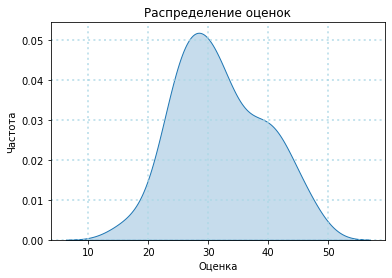

In [16]:

sns.kdeplot(data['score'],shade=True)
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок')
plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)
plt.show()

## Проверка значимости средних значений двух групп с помощью Т-теста двух независимых групп

In [17]:
mu1 = 30

data1 = np.repeat(mu1, len(data))
data2 = data['score']
t_stat, p_value = ttest_ind(data1, data2)

print(f"t-статистика: {t_stat:.3f}")

if p_value < 0.05:
    print('Средние оценки между группами статистически различаются')
    print(f"p-value: {p_value:.3f}")

else:
    print('Средние оценки между группами не различаются')
    print(f"p-value: {p_value:.3f}")


t-статистика: -2.198
Средние оценки между группами статистически различаются
p-value: 0.030


## Однофакторный дисперсионный анализ возрастных групп

In [18]:

# Разделение данных на группы
group1 = data[data["age_group"] == "До 25"]["score"]
group2 = data[data["age_group"] == "25-34"]["score"]
group3 = data[data["age_group"] == "35-44"]["score"]
group4 = data[data["age_group"] == "45-54"]["score"]
group5 = data[data["age_group"] == "55-64"]["score"]
group6 = data[data["age_group"] == "65 и страше"]["score"]

# Проведение однофакторного дисперсионного анализа
f_value, p_value = f_oneway(group1, group2, group3, group4, group5, group6)

# Вывод результатов
print(f"Значение F-статистики: {f_value:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print('Средние оценки между возрастными группами статистически различаются')
else:
    print('Средние оценки между возрастными группами не различаются')


Значение F-статистики: 6.993
P-value: 0.000
Средние оценки между возрастными группами статистически различаются


**Итоговый Вывод:**

--------

**Значимо ли улучшился дизайн посадочной страницы сайта?**

**Ответ:** Улучшение дизайна посадочной страницы сайта является статистически значимым при уровне значимости равным **0.05**, однако стоит заметить, что при уровне более высоких уровней значимости равным,например, **0.01** - изменения не стат. значимы. 

--------

**Есть ли влияние возраста на оценку нового дизайна?**

**Ответ:** Есть, умеренная отрицательная корреляция (Спирмана) равная **-0.372**, также стоит отметить, что уровень значимости сильно меньше критического, а именно - **0.002** - корреляция стат. значима

--------
**Рекомендации отделу маркетинга по результатам проведенного анализа:**

**Ответ:** 

* Обратить внимание на возрастную структуру целевой аудитории, так как возраст оказывает влияние на оценку дизайна посадочной страницы сайта.

* Продолжать работу над улучшением дизайна посадочной страницы сайта, так как проведенный анализ показал, что улучшение дизайна является статистически значимым при уровне значимости **0.05** (**p-value=0.03**). Чтобы значимость проявлялась на более высоких уровней значимости для снижения вероятности ложных результатов.

* В целом, рекомендуется проводить более глубокий анализ потребностей и предпочтений целевой аудитории, чтобы оптимизировать дизайн посадочной страницы сайта и повысить эффективность маркетинговых кампаний.



--------
